In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = Path.cwd().parent / 'data'
graph_report = Path.cwd().parent / 'data_to_report'

if not graph_report.exists():
    graph_report.mkdir(parents=True)

df = pd.read_csv(
    data / 'limpo_solicitacoes_doc9.csv',
    parse_dates=[
        'datahora_abertura_solicitacao',
        'datahora_finalizacao_solicitacao',
        'datahora_audiencia',
        'prazo_para_inserir_dados',
        ]
    )

df = df.drop(columns=['Unnamed: 0'])

In [22]:
df

,id_solicitacao,nome_parceiro,nome_cliente,datahora_abertura_solicitacao,datahora_audiencia,prazo_para_inserir_dados,datahora_finalizacao_solicitacao,tipo,tipo_demanda,area_processo,...,orgao,comarca,uf_comarca,situacao_dados,orientacoes_inseridas_cliente,qtd_troca,qtd_declinio,houve_revelia,houve_ausencia,houve_ma_atuacao
0,4630148,Eduardo Aragão,MACHADO - EI,2024-12-30 16:03:46,2025-01-08 11:30:00,2025-01-03 11:30:00,2025-01-03 09:51:53.000000000,Audiências,preposto,Cível,...,Procon de Salgueiro - PE,Salgueiro - PE,PE,no prazo,com antecedencia,0,0,0,0,0
1,4630149,Sra. Maria Liz Oliveira,MACHADO - EI,2024-12-30 16:03:46,2025-01-09 10:30:00,2025-01-06 10:30:00,2025-01-09 12:54:42.000000000,Audiências,preposto,Cível,...,Procon de Fortaleza - CE,FORTALEZA - CE,CE,no prazo,com antecedencia,0,0,0,0,0
2,4630147,Aurora Rios,OLIVEIRA FREITAS - ME,2024-12-30 11:59:52,2025-01-30 09:50:00,2025-01-29 09:50:00,2025-01-30 10:38:17.000000000,Teleaudiência,combo,Cível,...,Foro de Salvador - BA,SALVADOR - BA,BA,no prazo,com antecedencia,0,0,0,0,0
3,4630141,Sr. Cauê Brito,OLIVEIRA FREITAS - ME,2024-12-30 10:03:41,2025-02-20 14:15:00,2025-02-17 14:15:00,2025-01-02 12:38:36.000000000,Audiências,combo,Cível,...,Foro de Teresópolis - RJ,Teresópolis - RJ,RJ,fora do prazo,com antecedencia,0,0,0,0,0
4,4630124,Aurora Rios,OLIVEIRA FREITAS - ME,2024-12-30 08:39:13,2025-02-04 14:10:00,2025-01-30 14:10:00,2025-02-04 14:38:19.000000000,Teleaudiência,combo,Cível,...,Foro de Campo Mourão - PR,Campo Mourão - PR,PR,no prazo,com antecedencia,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,4539922,Parceiro especial,DA ROSA,2024-06-02 10:32:02,2024-06-05 10:20:00,2024-06-04 10:20:00,2024-06-05 14:10:46,Audiências,advogado,Trabalhista,...,Trabalhista de Osasco - SP,Osasco - SP,SP,fora do prazo,com antecedencia,0,1,0,0,0
29994,4539922,Parceiro especial,DA ROSA,2024-06-02 10:32:02,2024-06-05 10:20:00,2024-06-04 10:20:00,2024-06-05 14:10:46,Audiências,advogado,Trabalhista,...,Trabalhista de Osasco - SP,Osasco - SP,SP,fora do prazo,com antecedencia,0,1,0,0,0
29995,4539921,Ana Lívia Castro,DA ROSA,2024-06-02 10:29:30,2024-06-05 09:00:00,2024-06-04 09:00:00,2024-06-06 06:00:53,Audiências,advogado,Trabalhista,...,Trabalhista de Natal - RN,Natal - RN,RN,no prazo,com antecedencia,0,0,0,0,0
29996,4539920,Vicente Cavalcanti,DA ROSA,2024-06-02 10:27:02,2024-06-05 08:30:00,2024-06-04 08:30:00,2024-06-17 16:35:26,Audiências,advogado,Trabalhista,...,Trabalhista de João Pessoa - PB,João Pessoa - PB,PB,fora do prazo,com antecedencia,0,0,0,1,0


# Executivo
_Pergunta do stakeholder:_

_“Se tivéssemos que priorizar melhorias, por onde começar? Que tipo de mudança teria maior impacto na redução de falhas ou aumento da eficiência operacional?”_

Essa é uma pergunta aberta e de difícil resposta.

Uma análise exploratória geral é necessária para identificar possíveis pontos de melhorias no negócio

## Análise Temporal

### Abertura de solicitações por semana e dia

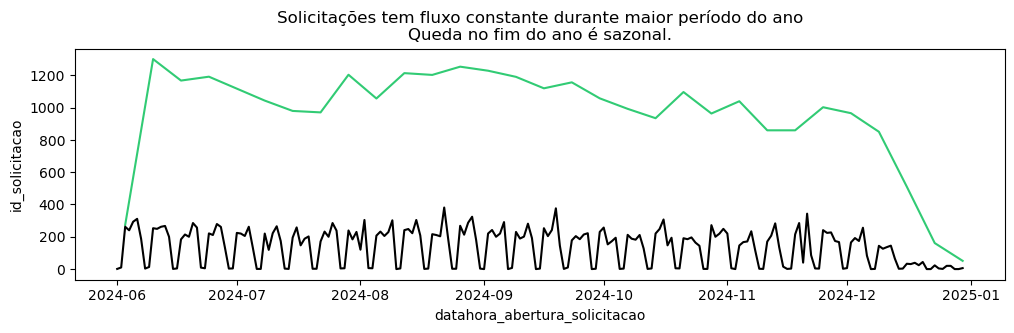

In [3]:
plt.figure(figsize=(12, 3))


solic_seman_df = (
        df
        .groupby(pd.Grouper(key='datahora_abertura_solicitacao', freq='W-MON'))
        ['id_solicitacao']
        .count()
)

solic_semana_plt = sns.lineplot(
    data =solic_seman_df,
    color='#31cb74'
)


solic_dias_df = (
        df
        .groupby(pd.Grouper(key='datahora_abertura_solicitacao', freq='D'))
        ['id_solicitacao']
        .count()
)

solic_dia_plt = sns.lineplot(
    data = solic_dias_df,
    color='#000000'
)

plt.title('Solicitações tem fluxo constante durante maior período do ano\n' \
    'Queda no fim do ano é sazonal.');

In [4]:
solic_seman_df.to_csv(graph_report / 'solicitacoes_por_semana.csv')
solic_dias_df.to_csv(graph_report / 'solicitacoes_por_dia.csv')

A quantidade de abertura de solicitações por semana parece razoavelmente constante.

A tendência de queda no fim do ano pode ser explicada pela existência do feriado forense, em que os tribunais e demais órgãos trabalham em regime especial.

### Tempo de preparo

Uma hipótese de origem de falhas é a de que o momento de abertura da solicitação pode ser muito próximo da data da audiência.

Esse comportamento, além de levar ao preparo inadequado dos parceiros, caso detectado, também pode estar se agravando com o tempo.


In [5]:
df_delta = (
    df[['datahora_abertura_solicitacao', 'datahora_audiencia']]
    .assign(delta_time = lambda x: x['datahora_audiencia'] - x['datahora_abertura_solicitacao'])
)

(
    df_delta['delta_time'].dt.days
    .to_csv(graph_report / 'distribuicao_lead_time.csv', index=False)
)

df_delta

,datahora_abertura_solicitacao,datahora_audiencia,delta_time
0,2024-12-30 16:03:46,2025-01-08 11:30:00,8 days 19:26:14
1,2024-12-30 16:03:46,2025-01-09 10:30:00,9 days 18:26:14
2,2024-12-30 11:59:52,2025-01-30 09:50:00,30 days 21:50:08
3,2024-12-30 10:03:41,2025-02-20 14:15:00,52 days 04:11:19
4,2024-12-30 08:39:13,2025-02-04 14:10:00,36 days 05:30:47
...,...,...,...
29993,2024-06-02 10:32:02,2024-06-05 10:20:00,2 days 23:47:58
29994,2024-06-02 10:32:02,2024-06-05 10:20:00,2 days 23:47:58
29995,2024-06-02 10:29:30,2024-06-05 09:00:00,2 days 22:30:30
29996,2024-06-02 10:27:02,2024-06-05 08:30:00,2 days 22:02:58


O _delta_ entre o momento de abertura da solicitação e o momento da audiência, neste banco de dados, pode ilustrar uma falha operacional.

Atualmente é possível encontrar desde casos com agendamentos com mais de 365 dias até agendamentos supostamente criados _depois_ que a audiência foi realizada -- exemplificado por um _delta_ negativo.

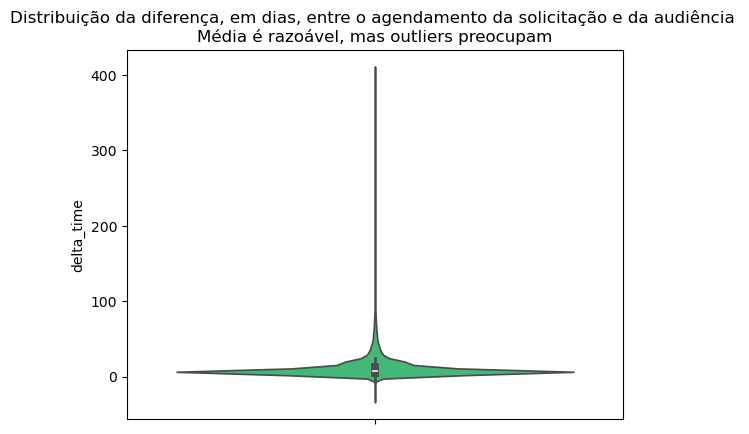

In [6]:
sns.violinplot(
    data=df_delta['delta_time'].dt.days,
    color='#31cb74'
)

plt.title(
     'Distribuição da diferença, em dias, entre o agendamento da solicitação e da audiência \n' + \
        'Média é razoável, mas outliers preocupam'
    );

In [7]:
df_delta['delta_time'].describe()

count                         29998
mean     12 days 06:41:15.772484832
std      16 days 10:40:28.403899938
min              -30 days +16:35:00
25%                 5 days 18:43:51
50%          7 days 15:54:32.500000
75%         13 days 04:30:13.250000
max               407 days 20:56:01
Name: delta_time, dtype: object

#### IQR para detecção dos outliers

In [8]:
qrt = df_delta['delta_time'].quantile([0.25, 0.75])
iqr = qrt[0.75] - qrt[0.25]
iqr

Timedelta('7 days 09:46:22.250000')

Considerando um fator de ampliação moderado para o Intervalo Interquartil, e selecionando também as entradas com _deltas_ negativos, encontramos cerca de 3000 registros, o que reprentra aproximadamente 10% da base. Um índice considerável.

Estas discrepâncias entre o momento da solicitação e o momento da audiência podem indicar que houve um erro no momento de registro de pedido e não houve conferência de nenhuma parte envolvida. Caso não tenha sido feita a correção em tempo hábil, a expectativa do atendimento do pedido pode ser frustrada, uma vez que o cliente esperará algo em um momento em que não acontecerá.

Maiores esforços podem ser investidos para investigar este ponto. Agendamentos com um _delta_ próximo de 365 (+30) dias podem indicar uma desatenção do usuário, que tentou agendar um evento para o próximo mês mas, por equívoco, também alterou indevidamente o campo do ano.

Acima de tudo, esta análise preliminar me faz acreditar ser necessário investigar a possibilidade de criar validações para o registro de solicitações, para que não sejam possíveis agendamentos em datas em um futuro muito distante, tampouco no passado. É necessário dialogar com outros times com o objetivo de se chegar em uma solução.

Pode ser, por exemplo, sugerido a definição de intervalo possível para o registro de solicitações de audiências, para que seja factível o preparo adequado dos clientes e parceiros da organização.

Em caso semelhante, pode ser necessário que sejam feitas testes em UI/UX da plataforma para que este comportamento errádico (caso comprovado) seja mitigado.

In [9]:
(
    df_delta[
        (df_delta['delta_time'] > iqr * 3) 
        # |
        # (df_delta['delta_time'].astype(int) < 0)
        ]
)

,datahora_abertura_solicitacao,datahora_audiencia,delta_time
2,2024-12-30 11:59:52,2025-01-30 09:50:00,30 days 21:50:08
3,2024-12-30 10:03:41,2025-02-20 14:15:00,52 days 04:11:19
4,2024-12-30 08:39:13,2025-02-04 14:10:00,36 days 05:30:47
5,2024-12-30 06:43:15,2025-03-18 15:00:00,78 days 08:16:45
6,2024-12-27 19:52:05,2025-02-04 08:00:00,38 days 12:07:55
...,...,...,...
29884,2024-06-03 14:17:31,2024-07-15 07:20:00,41 days 17:02:29
29919,2024-06-03 12:26:39,2024-11-13 08:15:00,162 days 19:48:21
29925,2024-06-03 11:55:45,2024-07-03 12:20:00,30 days 00:24:15
29938,2024-06-03 11:17:21,2024-07-02 08:15:00,28 days 20:57:39


In [10]:
(
    df_delta[
        (df_delta['delta_time'] > iqr * 3) |
        (df_delta['delta_time'].astype(int) < 0)
        ]
)

,datahora_abertura_solicitacao,datahora_audiencia,delta_time
2,2024-12-30 11:59:52,2025-01-30 09:50:00,30 days 21:50:08
3,2024-12-30 10:03:41,2025-02-20 14:15:00,52 days 04:11:19
4,2024-12-30 08:39:13,2025-02-04 14:10:00,36 days 05:30:47
5,2024-12-30 06:43:15,2025-03-18 15:00:00,78 days 08:16:45
6,2024-12-27 19:52:05,2025-02-04 08:00:00,38 days 12:07:55
...,...,...,...
29884,2024-06-03 14:17:31,2024-07-15 07:20:00,41 days 17:02:29
29919,2024-06-03 12:26:39,2024-11-13 08:15:00,162 days 19:48:21
29925,2024-06-03 11:55:45,2024-07-03 12:20:00,30 days 00:24:15
29938,2024-06-03 11:17:21,2024-07-02 08:15:00,28 days 20:57:39


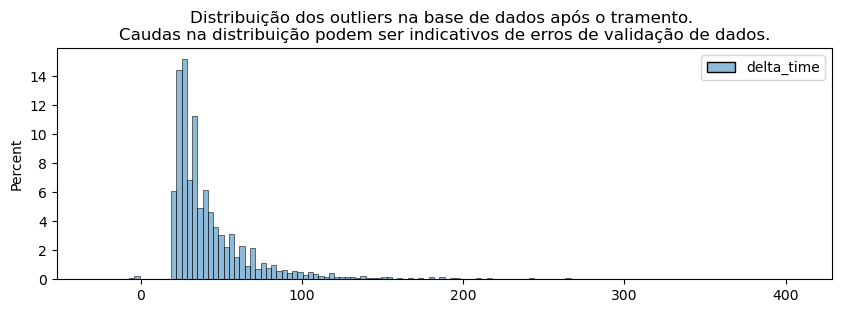

In [11]:
plt.figure(figsize=(10, 3))

df_delta_minus_outl = (
    df_delta[
        (df_delta['delta_time'] > iqr * 3) |
        (df_delta['delta_time'].astype(int) < 0)
        ]['delta_time'].dt.days),

sns.histplot(
    data=df_delta_minus_outl,
        stat='percent',
        color='#31cb74'
)

plt.title(
     'Distribuição dos outliers na base de dados após o tramento. \n' + \
        'Caudas na distribuição podem ser indicativos de erros de validação de dados.'
    );


(
    pd.DataFrame(
        df_delta_minus_outl)
        .T
        .value_counts(normalize=True) * 100
).to_csv(graph_report / 'leadtime_sem_outliers_menores.csv')

### Atividade por dia da semana

As solicitações parecem distribuídas decentemente durante a semana, não sendo necessário planejar escalamento de infraestrutura dias de movimento mais intenso na infraestrutura da empresa.

,SegundaFeira,TercaFeira,QuartaFeira,QuintaFeira,SextaFeira,Sabado,Domingo
id_solicitacao,6050,5984,5911,6847,5032,64,110


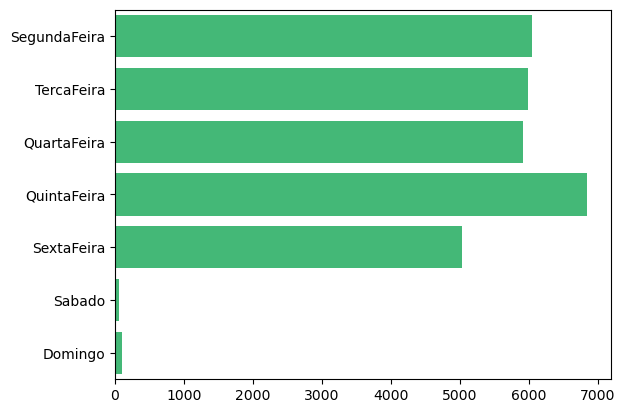

In [12]:
df_ativ_dia_semana = (
    df[['id_solicitacao', 'datahora_abertura_solicitacao']]
    .assign(day_of_week=lambda x: x['datahora_abertura_solicitacao'].dt.weekday)
    .groupby('day_of_week')
    ['id_solicitacao']
    .count()
    .reset_index()
    .T
    .rename(columns={
        0: 'SegundaFeira',
        1: 'TercaFeira',
        2: 'QuartaFeira',
        3: 'QuintaFeira',
        4: 'SextaFeira',
        5: 'Sabado',
        6: 'Domingo',

    })
    .drop('day_of_week')
)

sns.barplot(
    data=df_ativ_dia_semana,
    orient='h',
    color='#31cb74'
)

(
    df_ativ_dia_semana
    .to_csv(graph_report / 'solic_dias_semana.csv', index=False)
)

df_ativ_dia_semana

### Atividade por horário do dia

As solicitações também são feitas em horários considerados normais, durante as horas úteis do dia.
Dados podem sustentar a decisão de escalar infraestrutura nestes horários, caso seja observada sobrecarga dos servidores do serviço.

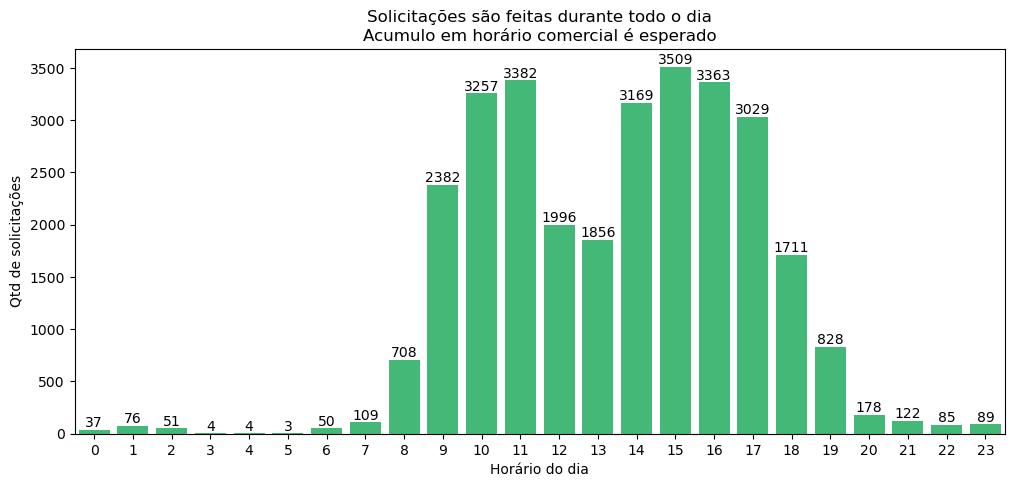

In [13]:
plt.figure(figsize=(12, 5))

activt_hours = (
    df[['id_solicitacao', 'datahora_abertura_solicitacao']]
    .assign(hour_of_day=lambda x: x['datahora_abertura_solicitacao'].dt.hour)
    .groupby('hour_of_day')
    ['id_solicitacao']
    .count()
    .reset_index()
    .rename(columns={
        'hour_of_day': 'Horário do dia',
        'id_solicitacao': 'Qtd de solicitações'
    })
)

activt_hours_plt = sns.barplot(
    data=activt_hours,
    x='Horário do dia',
    y='Qtd de solicitações',
    color='#31cb74'
)

for container in activt_hours_plt.containers:
    bar_values = [bar.get_width() for bar in container]
    activt_hours_plt.bar_label(
        container,
        
        color='black',
        padding=0,
        label_type='edge'
        )

plt.title(
     'Solicitações são feitas durante todo o dia\n' + \
    'Acumulo em horário comercial é esperado'
    );

## Análise Categórica

### Problemas por Estados

Alguns estados apresentam taxa de problemas distante dos demais: Ainda que o índice de revéses esteja muito pequeno, Roraima, Acre e Tocantins se destacam dos demais Estados da Federação.

Parte significativa do alcance da marca tem relação com a capacidade de gerar adesões espontâneas através da boa reputação na comunidade -- jurídica, entre escritórios de advocacia, neste caso.

O destaque destas regiões nos índices de erro pode ser um sinal de alerta para que sejam estudados os motivos deste avanço e medidas sejam adotadas para que a reputação da marca não seja prejudicada.

O tamanho da amostra influencia bastante o resultado desta análise, sendo somente um caso preliminar e justificável para a ampliação do escopo de pesquisa.

In [14]:
any_problem = (
    df[[
        'houve_revelia',
        'houve_ausencia',
        'houve_ma_atuacao']]
        .apply(lambda x: 1 if any(x) == 1 else 0, axis=1)
    )

df_problem_uf = pd.concat(
    [
        df[['uf_comarca']], any_problem
    ],axis=1
    ).rename(columns={0: 'any_problem'})

df_problem_uf

,uf_comarca,any_problem
0,PE,0
1,CE,0
2,BA,0
3,RJ,0
4,PR,0
...,...,...
29993,SP,0
29994,SP,0
29995,RN,0
29996,PB,1


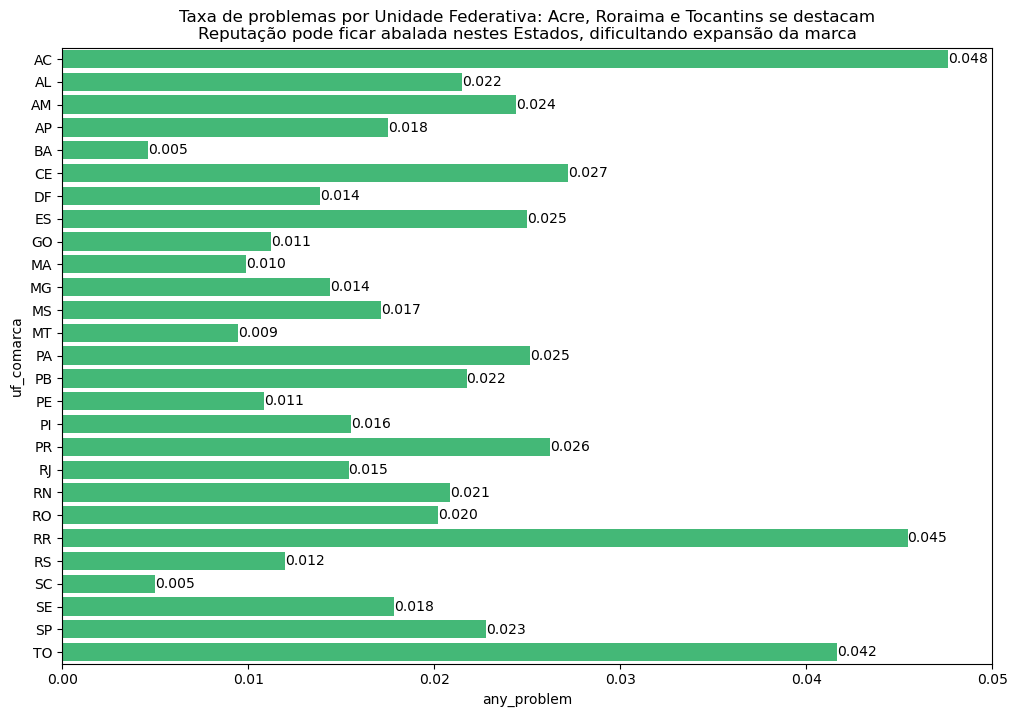

In [15]:
plt.figure(figsize=(12, 8))

df_problem_uf = (
        df_problem_uf
        .groupby('uf_comarca')
        .agg({'any_problem': 'mean'})
        .reset_index()
    )

problem_uf_plot = sns.barplot(
    data = df_problem_uf,
    orient='h',
    color='#31cb74',
    x='any_problem',
    y='uf_comarca'
)


for container in problem_uf_plot.containers:
    bar_values = [bar.get_width() for bar in container]
    problem_uf_plot.bar_label(
        container,
        color='black',
        fmt='{:.3f}',
        padding=0,
        label_type='edge'
        )

plt.title(
    'Taxa de problemas por Unidade Federativa: Acre, Roraima e Tocantins se destacam\n' + \
    'Reputação pode ficar abalada nestes Estados, dificultando expansão da marca'
    );

df_problem_uf.to_csv(graph_report / 'taxa_problemas_uf.csv', index=False)

O metódo acima identifica _se houve um problema_ em determinada solicitação.

Por garantia, também foi desenvolvido um outro algoritmo que leva em consideração _a quantidade de problemas_ em cada solicitação. O sistema parece considerar ser possível a existência de só um problema.

`Revelia` e `ausência` são problemas mutuamente excludentes, portanto faz sentido que seja possível se deparar com um destes infortúnios durante o atendimento de um pedido. `Má atuação`, enfim, não poderia ser causada em caso de `revelia`, já que o parceiro não atendeu ao chamado, mas poderia ser causada em conjunto com `ausencia`.

A implementação da lógica excludente entre estes casos pode levar à obscuridade a respeito de falhas operacionais, impossibilitando que sejam sanadas.

In [16]:
df_sum_problems = (
    df[['uf_comarca', 'houve_revelia', 'houve_ausencia', 'houve_ma_atuacao']]
    .copy()
    )

df_sum_problems['sum_of_problems'] = df[['houve_revelia', 'houve_ausencia', 'houve_ma_atuacao']].apply(sum, axis=1)


In [17]:
df_prob_uf_table = (
    df_sum_problems
    .groupby('uf_comarca')
    .agg({
        'uf_comarca': 'count',
        'sum_of_problems': 'sum',
        }
        )
    .assign(mean_of_problems = lambda x: x['sum_of_problems'] / x['uf_comarca'])
    .rename(columns={
        'uf_comarca': 'Quantidade de Solicitações na UF',
        'sum_of_problems': 'Quantidade de problemas encontrados na UF',
        'mean_of_problems': 'Taxa de problemas na UF'

    })
    .sort_values('Taxa de problemas na UF', ascending=False)
)

df_prob_uf_table.to_csv(graph_report / 'tabela_problemas_uf.csv')

df_prob_uf_table

,Quantidade de Solicitações na UF,Quantidade de problemas encontrados na UF,Taxa de problemas na UF
uf_comarca,,,
AC,42,2,0.047619
RR,22,1,0.045455
TO,144,6,0.041667
CE,1176,32,0.027211
PR,1982,52,0.026236
PA,318,8,0.025157
ES,600,15,0.025000
AM,328,8,0.024390
SP,5402,123,0.022769


In [18]:
# Ambas as metodologias encontraram o mesmo resultado.

# Demonstra solidez na metodologia e também que não é 
# possível atribuir mais de um tipo de problema para
# determinada solicitação

(
    df_problem_uf.set_index('uf_comarca')['any_problem']
    ==
    (
        df_sum_problems
        .groupby('uf_comarca')
        .agg({
            'sum_of_problems': 'sum',
            'uf_comarca': 'count'
            })
            .assign(mean_of_problems = lambda x: x['sum_of_problems'] / x['uf_comarca'])
            ['mean_of_problems']
    )
)

uf_comarca
AC    True
AL    True
AM    True
AP    True
BA    True
CE    True
DF    True
ES    True
GO    True
MA    True
MG    True
MS    True
MT    True
PA    True
PB    True
PE    True
PI    True
PR    True
RJ    True
RN    True
RO    True
RR    True
RS    True
SC    True
SE    True
SP    True
TO    True
dtype: bool